In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.linalg
from scipy.linalg import lu_factor, lu_solve
from sklearn.linear_model import LinearRegression

In [67]:
players_data = pd.read_csv ("./data/all_seasons.csv")
#Remove undrafted
players_data = players_data.drop(players_data[players_data.draft_round == 'Undrafted'].index)
players_data['draft_round'] = pd.to_numeric(players_data['draft_round'])

<AxesSubplot: >

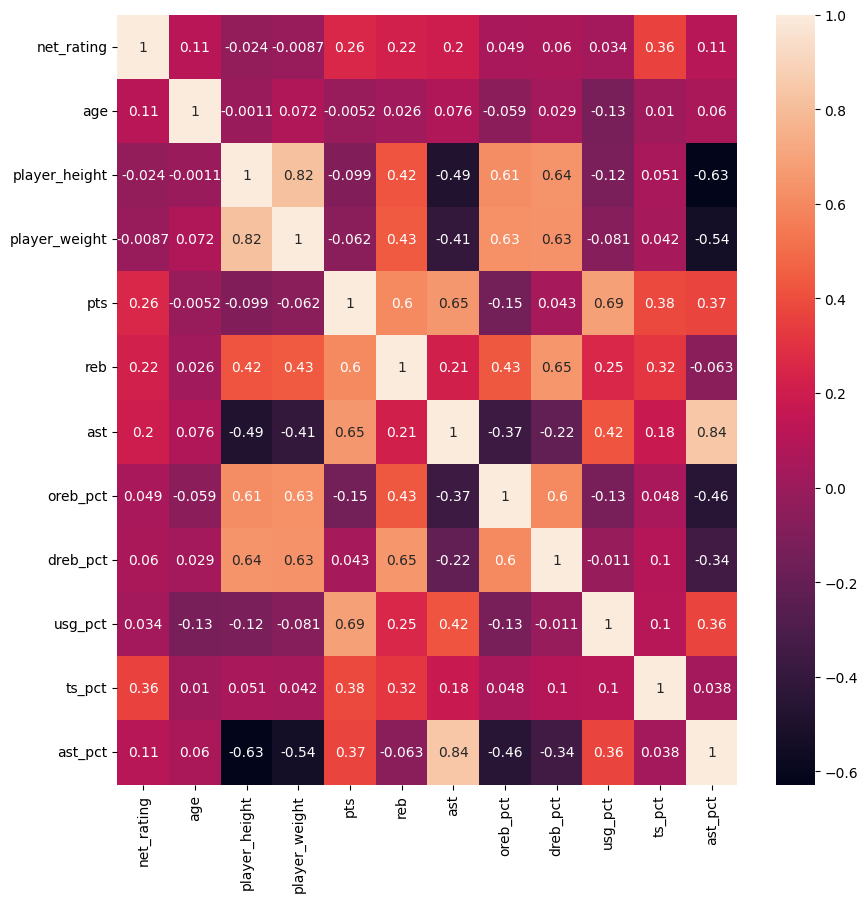

In [71]:
test = players_data[["net_rating", "age", "player_height", "player_weight", "pts", "reb", "ast","oreb_pct","dreb_pct","usg_pct","ts_pct","ast_pct"]]
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(test.corr(), annot=True)

In [79]:
#Normalize
scaler = StandardScaler()
A = scaler.fit_transform(A)

In [80]:
#Initialize
A = players_data[["age", "player_height", "player_weight", "pts", "reb", "ast","oreb_pct","dreb_pct","usg_pct","ts_pct","ast_pct"]]
b = players_data["net_rating"]

#Normalize
scaler = MinMaxScaler()
A = scaler.fit_transform(A)
#LU
A = np.hstack((np.ones((len(A), 1)), A))
XX = np.dot(A.T,A)
LU, piv = lu_factor(XX)
L, U, P = scipy.linalg.lu(XX)
bs = lu_solve((LU, piv), np.dot(A.T, b))
betahat = np.dot(U, bs)
betahat

array([-1.82439958e+01, -5.92769379e-01, -1.42322600e+01, -1.39560635e+01,
        1.50218089e+01,  1.06970454e+00,  9.18620205e+00,  1.78543163e+01,
        3.93265391e-02, -3.63727198e+01,  6.24417228e+01, -3.84805585e+00])

In [81]:
reg = LinearRegression().fit(A, b)
reg.coef_

array([  0.        ,   5.78779544,  -3.64333456,  -3.35998659,
        19.34251515,  -3.14876042,  -1.5288212 ,  23.07402752,
         4.621945  , -40.56153503,  49.84167233,  11.48757919])